Now that we're familiar with some of the basic library functionality, we're going to dive into some abstractions that are used for managing the data.  We'll be looking primarily at the `containers` module, which contains a few wrappers and helpers for managing large data sets, in particular large numbers of target pixel files.


In [1]:
from utilities.containers import *

/home/rodot/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


The first thing we'll do is go over the basic data containers within the library.  The first is a wrapper for a fits hdu list in order to save a little memory when dealing with large data sets.

The `BasicFitsContainer` allows us to wrap a fits hdu list to contain more minimal data about an object.  Before we can instantiate it, we need an object to work with.  Going back to our queries and downloads tutorials, we'll grab the data of an object from a local database.

In [2]:
from utilities import data
from utilities.queries import search
from utilities.downloads import urls
from utilities.downloads.downloader import fits_downloader

In [3]:
campaign = 8 # we'll stick to campagin 8 for now

c8_objs = search.search_file(data.FULL_TARGET_LIST, campaign=campaign)

epic_id = c8_objs.keys()[0] # we'll use the first object
print epic_id

220463108


The BasicFitsContainer constructor is a little interesting.  We supply a flag depending on what kind of k2 hlsp we want it to hold ('EV','VJ', or 'PIX' for EVEREST, SFF, and TPF respectively), then we give it the hdu list and fields.  As an example, we'll build a `BasicFitsContainer` from the `EVEREST` processing of our object.

First we'll download our fits file, then we'll create the `BasicFitsContainer`.

In [4]:
everest_url = urls.everest(epic_id, campaign)
everest_hdu = next(fits_downloader([everest_url]))

print everest_hdu.info()

Filename: <type '_io.BytesIO'>
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      29   ()      
  1  ARRAYS        1 BinTableHDU    316   3853R x 13C   [D, D, D, D, J, D, D, D, D, D, D, D, D]   
  2  PIXELS        1 BinTableHDU     19   3853R x 2C   [58D, 333D]   
  3  APERTURE MASK    1 ImageHDU        54   (11, 11)   int64   
  4  POSTAGE STAMPS    1 BinTableHDU     61   11R x 3C   [11D, 11D, 11D]   
  5  HI RES IMAGE    1 ImageHDU        54   (110, 110)   float64   
None


In [5]:
everest_bfc = BasicFitsContainer('EV', everest_hdu, 'FCOR')

Now we'll just go through an inspect some of the attributes of the conatiner.

In [6]:
print everest_bfc.FCOR # the flux column
print everest_bfc.t # the time column
print everest_bfc.EPIC # the EPIC ID
print everest_bfc.processing # the processing contained in the data

[305123.77019247 305172.86957408 305154.59823563 ... 304932.75049315
 304942.14187423 304926.30150723]
[2559.06835157 2559.08878378 2559.10921599 ... 2637.73040318 2637.7508351
 2637.77126692]
220463108
EVEREST


The `BasicFitsContainer` objects are very... well... basic.  The idea is to hold as little info as we need for each object in a neat an accessable way.  Next we'll look at the other two flags, that is 'VJ' and 'PIX'.

First, 'VJ', which is very similar to 'EV'

In [7]:
sff_url = urls.sff(epic_id, campaign)
sff_hdu = next(fits_downloader([sff_url]))

print sff_hdu.info()

sff_bfc = BasicFitsContainer('VJ', sff_hdu, 'FCOR')

print sff_bfc.FCOR # the flux column
print sff_bfc.t # the time column
print sff_bfc.EPIC # the EPIC ID
print sff_bfc.processing # the processing contained in the data

Filename: <type '_io.BytesIO'>
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      25   ()      
  1  BESTAPER      1 BinTableHDU    242   3446R x 6C   [D, D, D, D, I, J]   
  2  CIRC_APER0    1 BinTableHDU    242   3446R x 6C   [D, D, D, D, I, J]   
  3  CIRC_APER1    1 BinTableHDU    242   3446R x 6C   [D, D, D, D, I, J]   
  4  CIRC_APER2    1 BinTableHDU    242   3446R x 6C   [D, D, D, D, I, J]   
  5  CIRC_APER3    1 BinTableHDU    242   3446R x 6C   [D, D, D, D, I, J]   
  6  CIRC_APER4    1 BinTableHDU    242   3446R x 6C   [D, D, D, D, I, J]   
  7  CIRC_APER5    1 BinTableHDU    242   3446R x 6C   [D, D, D, D, I, J]   
  8  CIRC_APER6    1 BinTableHDU    242   3446R x 6C   [D, D, D, D, I, J]   
  9  CIRC_APER7    1 BinTableHDU    242   3446R x 6C   [D, D, D, D, I, J]   
 10  CIRC_APER8    1 BinTableHDU    242   3446R x 6C   [D, D, D, D, I, J]   
 11  CIRC_APER9    1 BinTableHDU    242   3446R x 6C   [D, D, D, D, I, J]   
 12  PRF_

The 'PIX' flag is a little different, it contains target pixel file information, including the relative pixel indices on the Kepler CCD.

In [8]:
tpf_url = urls.tpf(epic_id, campaign)
tpf_hdu = next(fits_downloader([tpf_url]))

print tpf_hdu.info()
print tpf_hdu[1].data.names

tpf_bfc = BasicFitsContainer('PIX', tpf_hdu)

print tpf_bfc.pixels # the flux column, note the different name
print tpf_bfc.col, tpf_bfc.row # the relative pixel coordinates on the CCD
print tpf_bfc.m, tpf_bfc.n # the shape of the postage stamp
print tpf_bfc.EPIC # the EPIC ID

Filename: <type '_io.BytesIO'>
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      54   ()      
  1  TARGETTABLES    1 BinTableHDU    282   3853R x 13C   [D, E, J, 121J, 121E, 121E, 121E, 121E, 121E, J, E, E, 0E]   
  2  APERTURE      1 ImageHDU        48   (11, 11)   int32   
None
['TIME', 'TIMECORR', 'CADENCENO', 'RAW_CNTS', 'FLUX', 'FLUX_ERR', 'FLUX_BKG', 'FLUX_BKG_ERR', 'COSMIC_RAYS', 'QUALITY', 'POS_CORR1', 'POS_CORR2', 'RB_LEVEL']
[[[            nan             nan  8.03227806e+00 ... -3.87139954e-02
    2.25768304e+00  7.98819399e+00]
  [            nan  9.57813454e+00  1.56565580e+01 ...  4.55063200e+00
    4.60757685e+00  8.15919971e+00]
  [ 2.64864182e+00  8.97050476e+00  2.21161442e+01 ...  1.57418575e+01
    1.63996868e+01  8.40962982e+00]
  ...
  [ 7.52387094e+00  5.51481628e+00  1.36842051e+01 ...  5.04453049e+01
    4.32998359e-01  7.11088467e+00]
  [ 1.58871007e+00  2.80957437e+00  1.50543365e+01 ...  2.02322674e+01
    1.

So now we know some basic functionality of the `BasicFitsContainer`.  Now we're going to abstract lists of `BasicFitsContainer`s for many objects over a campaign.  We can use an even simpler object to represent a Kepler CCD, aptly named `CCD`.  It's instantiated with a campaign, module, channel, and a field name corresponding to which TPF data column we wish to represent pixels as.

In [9]:
ccd = CCD(campaign=8, module=6, channel=2, field='FLUX')
print ccd

CCD(module=6, channel=2, field='FLUX', campaign=8)


We can then pass a `CCD` object into a custom class that will download and manage our data for us.  We use the `PixelMapContainer` class to download and manage target pixel files for all objects within a CCD.  We'll start off with a basic instantiation and explore the functionality of the class.  This will automatically begin downloading all of the target pixel files for the given CCD and convert them to `BasicFitsContainer` objects.  This may take a few minutes.

In [10]:
cont = PixelMapContainer(ccd)

First, let's go over some of the attributes of the `PixelMapContainer` object.

In [11]:
print len(cont) # the number of objects downloaded
print cont.ccd # we can access the ccd that it was made from
print cont.epic_map.items()[0] # a dictionary mapping EPIC IDs to BasicFitsContainers
print cont[0] # Access a BasicFitsContainer by index like a list
for i, obj in enumerate(cont): # the container is iterable
    if i > 5:
        break
    print obj

308
CCD(module=6, channel=2, field='FLUX', campaign=8)
(220265472, <utilities.containers.BasicFitsContainer object at 0x7fbeff036f50>)


So, why do we want to use this container anyway?  Well, on it's own, it's functionality is limited, but we can still use it to more easily explore the set of target pixels within a specific module.  For example, we can look at a crude distribution of photometric fluxes at some epoch by summing up all of the pixels within the first postage stamp for each object.

We'll use this as a time to introduce the `conversions` module, which is a simple module of two functions for transoforming back and forth betweeen Kepler magnitudes and fluxes.  We'll convert the total fluxes to Kepler magnitudes as the scale is easier to view.

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import richardsplot as rplot

from utilities.conversions import *

Text(0.5,0,'Kepler Magnitude')

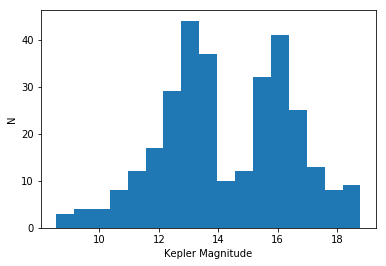

In [14]:
total_fluxes = np.array([np.nansum(obj.pixels[0]) for obj in cont])
magnitudes = fluxToMag(total_fluxes)

plt.hist(magnitudes, bins=int(np.sqrt(len(cont))), histtype='stepfilled')

plt.ylabel('N')
plt.xlabel('Kepler Magnitude')

Next we'll get into some of the few but useful methods of the `PixelMapContainer` class.  First, we'll start off with a pair of complimentary methods for "masking" out certain objects within a K2 CCD.  Say we have some object that is contaminating some analysis we're doing over the CCD, if we know it's EPIC ID, we can exclude the object from the `PixelMapContainer` functionality without deleting it and needing to re-download the dataset again.  We can exclude an objects with the `exclude_epic` method, and put it back in with the `include_epic` method.  We can view the list of currently exlcuded objects by accessing the `exclusions` attribute of the `PixelMapContainer` and verify that our object will not be iterated over by verifying that it is not in the `containers` attribute.

In [15]:
obj = cont[0]  # we'll chose the first object to exclude
epicid = obj.EPIC # and grab it's EPIC ID
print epicid

cont.exclude_epic(epicid) # exclude this object by EPIC ID
print cont.exclusions # we can see that our object is now in the list of excluded objects
print cont.exclusions[0].EPIC # verify that it is our object
print obj in cont.containers # and our object is not in our container that we iterate over

cont.include_epic(epicid) # put it back in
print cont.exclusions # we no longer are excluding any objects
print obj in cont.containers

220265472
220265472
False
[]
True


So let's do a quick example in which we exclude all bright sources, then plot the total flux within the first epoch of each object as we did above.

0

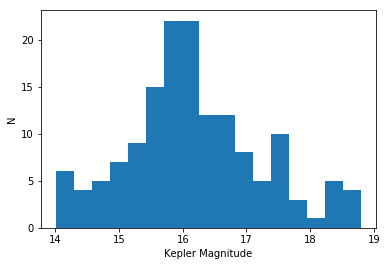

In [16]:
mag_limit = 14
flux_limit = magToFlux(mag_limit) # convert our Kepler mag to a flux

bright_objects = [obj.EPIC for obj in cont if np.nansum(obj.pixels[0]) > flux_limit] # grab all of the objects above 14th mag
cont.exclude_epic(*bright_objects) # the method take an arbitrary number of EPIC IDs are arguments

faint_fluxes = np.array([np.nansum(obj.pixels[0]) for obj in cont]) # same as before
faint_mags = fluxToMag(faint_fluxes)

plt.hist(faint_mags, bins=int(np.sqrt(len(cont))), histtype='stepfilled')

plt.ylabel('N')
plt.xlabel('Kepler Magnitude')

cont.include_epic(*bright_objects) # so we can use the full set for the next part

There's two more important methods we need to know about for the `PixelMapContainer`, and they are probably the biggest benefit of using the class.  We can save (and load) all of the target pixel data for a pixel map container into an hdf5 array so we don't have to re-download entire datasets next time we want to work with a CCD.  Taking advantage of the strucutre of the hdf5 file type, we can save and load multiple `CCD`s to and from a single hdf5 file.  

First, we'll to the obvious first step and save the data that we've downloaded.  We simply call the `save` method of the `PixelMapContainer` with an hdf5 file name as an argument to save the data set.  If the file provided does not exist on disc, then a new hdf5 file will be created.  Lastly, it is good to note that excluded data points will be saved in the hdf5 file.

In [17]:
my_dataset = 'K2PixelMap.hdf5'
cont.save(my_dataset)

  Writing... (Do Not Turn off Device or Stop Kernel)



CCD(module=6, channel=2, field='FLUX', campaign=8)

I'm not going to go over the `h5py` python module, as the class abstracts away most of it's functionality, but I will quickly go over the strucutre of the hdf5 files for those who want to open them by hand.  The names of the paths to the CCD modules in each file are as follows: `(\d{1,2})/(\d{1,2})/(\d{1,2})` in the order of campaign, module, and channel from the `CCD` object.  In each directory, objects are located in a path corresponding to their EPIC ID.  Each object has the following data entries:  `data` containing the array of target pixels and `idx` which contains a length-4 array of `height`, `width`, `row`, and `column` describing the location of the postage-stamp on the CCD.

So let's now load up our saved array from our `CCD` object.  We use the class method `from_hdf5` with the file name and `CCD` object as arguments to load our `PixelMapContainer` from disk.

In [18]:
loaded_cont = PixelMapContainer.from_hdf5(my_dataset, ccd)

Let's quickly verify that the data we loaded from disk contains all of the same objects.

In [19]:
for obj in loaded_cont:
    assert obj.EPIC in cont.epic_map
    
for obj in cont:
    assert obj.EPIC in loaded_cont.epic_map

So now we know every object in our original `PixelMapContainer` survived the saving and loading.  Now we can get on to a wrapper class for the `PixelMapContainer` that will allow us additional functionality for exploring and analysing the CCD modules.

We use the `PixeMapGenerator` class to wrap the `PixelMapContainer` with some extra functionality.  Instantiating the `PixelMapGenerator` is simple on it's own.  It simply takes a `PixelMapContainer` instance to wrap as it's first argument.  The constructor has an optional `cache` argument that by default is set to `False`.  Caching allows previously computed statistics to be stored for future use.  Since we're only working with a single `CCD` instance, we'll set it to `True` to give us a little extra speed.

In [20]:
gen = PixMapGenerator(cont, cache=True)

Again, we'll go over some of the basic functionality of the class with a few examples.  First and foremost, the primary purpose of the `PixMapGenerator` is to generate pixel maps; representations of the K2 CCD with target pixels filled in.  The class acts as a generator that iterates over K2 epochs.  Each iteration produces the representation of CCD at consecutive epochs.  

For the first example, we'll plot the first epoch of our CCD.

Text(0.5,1,'Module 6.3')

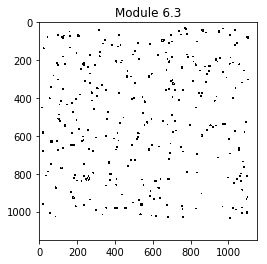

In [21]:
image = gen[0] # we can also access the representations by index

plt.imshow(image, cmap='Greys_r', interpolation='None')

plt.title("Module {}.{}".format(ccd.module, ccd.channel+1))

It might be a little hard to see what we're looking at here, so let's zoom in a little and change the scaling to Kepler magnitudes.

Text(0.5,1,'Module 6.3 Epoch 1')

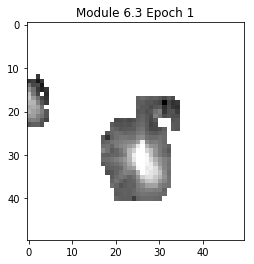

In [30]:
plt.imshow(fluxToMag(image[50:100,100:150]), cmap='Greys', interpolation='None')

plt.title("Module {}.{} Epoch 1".format(ccd.module, ccd.channel+1))

We can clearly make out some of the individual objects now.  Let's investigate the errors a little bit.  Let's see how the image changes between the first and last frames of the image.

Text(0.5,1,'Module 6.3 Difference')

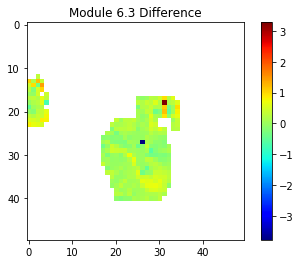

In [37]:
begin = fluxToMag(gen[0][50:100,100:150])
end = fluxToMag(gen[gen.N-1][50:100,100:150]) # gen.N is the number of epochs

im = plt.imshow(end-begin, cmap='jet', interpolation='None')
plt.colorbar(im)

plt.title("Module {}.{} Difference".format(ccd.module, ccd.channel+1))

It looks like there are a few outliers that are messing up our color scaling here.  Let's try excluding them.

/home/rodot/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less
  """
/home/rodot/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in greater
  


Text(0.5,1,'Module 6.3 Difference')

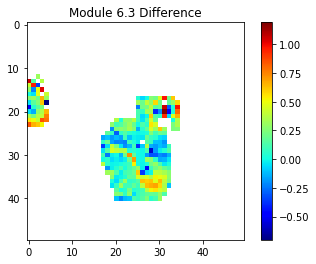

In [36]:
begin = fluxToMag(gen[0][50:100,100:150])
end = fluxToMag(gen[gen.N-1][50:100,100:150]) # gen.N is the number of epochs
diff = end-begin

diff[diff < np.nanmean(diff)-3*np.nanstd(diff)] = np.nan # cut out 2-sigma outliers
diff[diff > np.nanmean(diff)+3*np.nanstd(diff)] = np.nan

im = plt.imshow(diff, cmap='jet', interpolation='None')
plt.colorbar(im)

plt.title("Module {}.{} Difference".format(ccd.module, ccd.channel+1))

Now we can start to see some of the patterns appearing due to some systematic error.  But we aren't really concerned with individual objects as much as the behavior of the entire CCD.  The `PixMapGenerator` also have functionality to give us all of the pixels within a CCD in an arbitrary order so that we may do some sort of statistics on the CCD as a whole.  For this we'll use the `get_unordered` method.  First, we'll look at the distribution of pixels from the first epoch.

Text(0.5,0,'Kepler Magnitude')

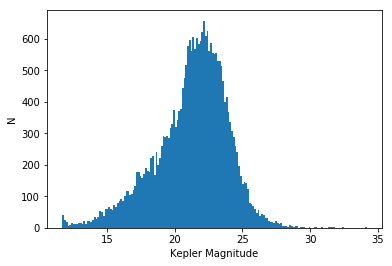

In [42]:
pixel_dist = gen.get_unordered(0)
mag_dist = fluxToMag(pixel_dist[pixel_dist > 0]) # we can't have negative fluxes, this is a byproduct of the processing

plt.hist(mag_dist, bins=int(np.sqrt(len(pixel_dist))), histtype='stepfilled')

plt.ylabel('N')
plt.xlabel('Kepler Magnitude')

Let's say we want a measure of how the average behavior of the CCD changes over time.  A good measure might be the median of the pixel distribution of each epoch.  Our `PixMapGenerator` object makes this easy.

(10, 22)

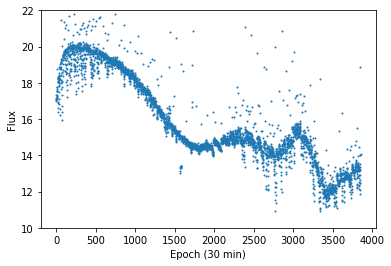

In [49]:
median_pixels = np.array([np.median(gen.get_unordered(i)) for i in xrange(gen.N)])

plt.plot(median_pixels, ls=' ', marker='.', ms=2)

plt.xlabel('Epoch (30 min)')
plt.ylabel('Flux')

plt.ylim(10,22)

These pixels are pretty faint, maybe it would be good to look at the behavior of the upper 50 percent of pixel at each epoch to get a better idea of the trends for bright objects.  We could also look at the lower 50 percent to watch how the faintest pixels are changing.  We can look at the medians of each of these sets at once using numpy's `percentile` function.  We'll whiten each "pixel light curve" so that we can view them all on the same scale.

(-1.5, 1.5)

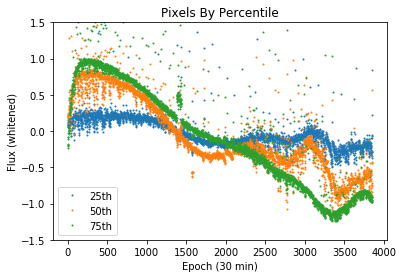

In [62]:
percentile_pixels = np.array([np.percentile(pixels, [25,50,75]) if len(pixels) else [np.nan]*3
                              for pixels in (gen.get_unordered(i) for i in xrange(gen.N))])

percentile_pixels -= np.nanmean(percentile_pixels, axis=0) # whiten the "pixel light curves"
percentile_pixels /= np.nanstd(percentile_pixels, axis=0)


plt.plot(percentile_pixels[:,0], ls=' ', marker='.', ms=2, label='25th')
plt.plot(percentile_pixels[:,1], ls=' ', marker='.', ms=2, label='50th')
plt.plot(percentile_pixels[:,2], ls=' ', marker='.', ms=2, label='75th')

plt.title('Pixels By Percentile')
plt.xlabel('Epoch (30 min)')
plt.ylabel('Flux (whitened)')

plt.legend()
plt.ylim(-1.5,1.5)

Finally, we'll take a look at what happens when we view an arbitrarily large number of percentiles.  We'll chose 100 in our case for time constraints, and plot each light curve on top of one another as an image, with the color corresponding to the value of the whitened light curve at each epoch.

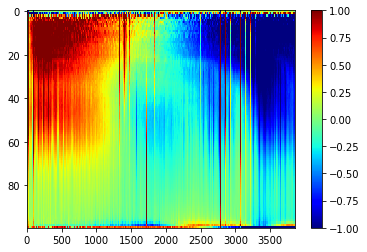

In [82]:
percentiles = np.linspace(0,100,100) # use 100 percentiles
percentile_pixels = np.array([np.percentile(pixels, percentiles) if len(pixels) else [np.nan]*100
                              for pixels in (gen.get_unordered(i) for i in xrange(gen.N))])

percentile_pixels -= np.nanmean(percentile_pixels, axis=0) # whiten the "pixel light curves"
percentile_pixels /= np.nanstd(percentile_pixels, axis=0)

im = plt.imshow(percentile_pixels.T[::-1], cmap='jet', aspect='auto', vmin=-1, vmax=1)
plt.colorbar(im)

And lastly, we can look at how the variation in the pixel light curves changes between percentiles.  We'll look at a "derivative" of the previous figure in percentile space, by simply subtracting consecutive rows before whitening.

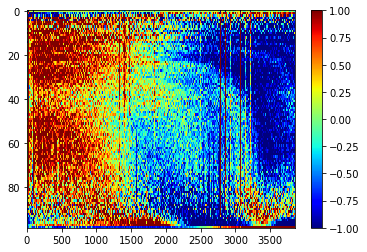

In [84]:
percentiles = np.linspace(0,100,100) # use 100 percentiles
percentile_pixels = np.array([np.percentile(pixels, percentiles) if len(pixels) else [np.nan]*100
                              for pixels in (gen.get_unordered(i) for i in xrange(gen.N))])

difference_pixels = percentile_pixels[:,1:] - percentile_pixels[:,:-1]

difference_pixels -= np.nanmean(difference_pixels, axis=0) # whiten the "pixel light curves"
difference_pixels /= np.nanstd(difference_pixels, axis=0)

im = plt.imshow(difference_pixels.T[::-1], cmap='jet', aspect='auto', vmin=-1, vmax=1)
plt.colorbar(im)